In [42]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings



## Enunciado
Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Para ello, la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año.

## Se pide
Tareas que nos pide la empresa:

- Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.
- Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.
- Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.
- Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.
- Estandariza los datos.
- Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.
- Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
- Utilizar un modelo de redes neuronales.
- Utilizar cualquier otro modelo de clasificación.
- Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.
- Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.
- Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.
- El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

## NOTAS:
Lo que se pide es un modelo end-to-end como los vistos en prácticas en el módulo. En este caso, hay que aplicar tres modelos y escoger el mejor, pero la parte previa es común a los tres.

Se tendrán en cuenta la estructura del código, las interpretaciones y las justificaciones.

El esquema que se pone en las tareas es un esquema general. Si se necesita hacer alguna tarea, se puede llevar a cabo. También es posible aplicar cualquier otro algoritmo visto en el módulo, siempre justificando y haciendo las cosas con un sentido. 

## Información de los datos:

El conjunto de datos consta de diez atributos numéricos y ocho categóricos.

- El atributo revenue puede ser usado como la etiqueta de la clase.
- Administrative, administrative duration, informational, informational duration, product related y product related duration representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.
- Las características bounce rate, exit rate y page value representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión. La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.
- La característica de special day indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.
- El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

In [46]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### 1. Tratamiento de datos (nulos y erróneos)

In [48]:
print(df.isnull().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [49]:
# Todos los NaN están juntos en estas 14 observaciones
df[df.Administrative.isna()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [50]:
df[df.Administrative.isna()].count()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                 14
SpecialDay                 14
Month                      14
OperatingSystems           14
Browser                    14
Region                     14
TrafficType                14
VisitorType                14
Weekend                    14
Revenue                    14
dtype: int64

In [51]:
# Los eliminamos
df = df.dropna()

In [52]:
# Administrative, administrative duration, informational, informational duration, product related, product related duration, page value y special day deberían tener valores >= 0, eliminamos negativos.
elim = df[(df['Administrative']<0) | (df['Administrative_Duration']<0) | (df['Informational']<0) | (df['Informational_Duration']<0) | (df['ProductRelated']<0) | (df['ProductRelated_Duration']<0) | (df['PageValues']<0) | (df['SpecialDay']<0)]
df = df.drop(elim.index)

# Bounce rate, exit rate son porcentajes
elim = df[(df['BounceRates']<0) | (df['BounceRates']>1) | (df['ExitRates']<0) | (df['ExitRates']>1)]
df = df.drop(elim.index)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [53]:
# Vemos el resto de posibles valores para las variables, se nos dice que solo hay dos tipos de visitantes, pero vemos un tercer grupo 'other', lo eliminamos
[df.Month.unique(),
 df.OperatingSystems.unique(),
 df.Browser.unique(),
 df.Region.unique(),
 df.TrafficType.unique(),
 df.VisitorType.unique(),]

[array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object),
 array([1, 2, 3, 4, 7, 6, 8, 5], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64),
 array([1, 2, 3, 4, 9, 5, 6, 7, 8], dtype=int64),
 array([ 1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
        16, 17, 20], dtype=int64),
 array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)]

In [54]:
elim = df[(df['VisitorType']=='Other')]
df = df.drop(elim.index)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### 2. Análisis de las variables y eliminación outliers

Comenzamos con el análisis univariante

Con las variables nominales, calculando sus frecuencias relativas

########### Para  Month ###########
          count
Month          
May    0.275209
Nov    0.243728
Mar    0.154452
Dec    0.136498
Oct    0.045007


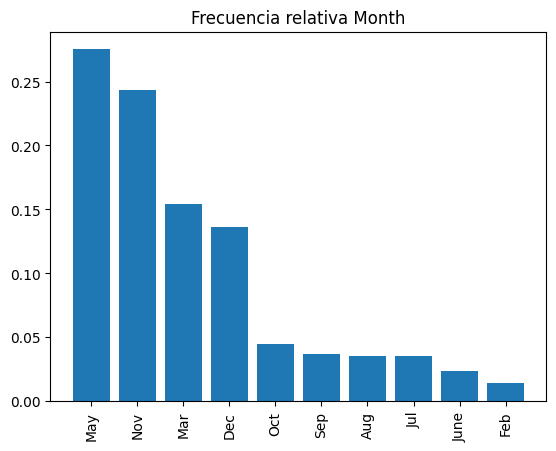

########### Para  Weekend ###########
            count
Weekend          
False    0.765945
True     0.234055


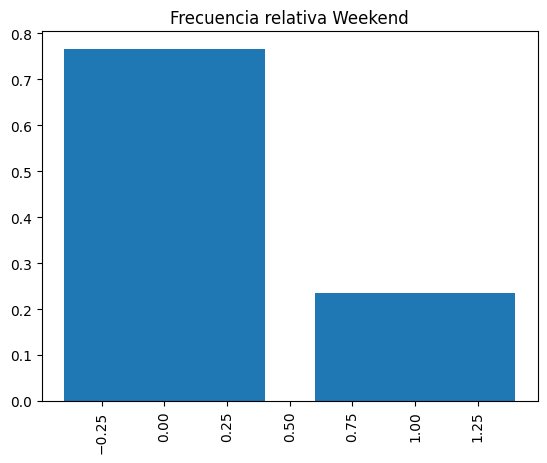

########### Para  VisitorType ###########
                      count
VisitorType                
Returning_Visitor  0.861125
New_Visitor        0.138875


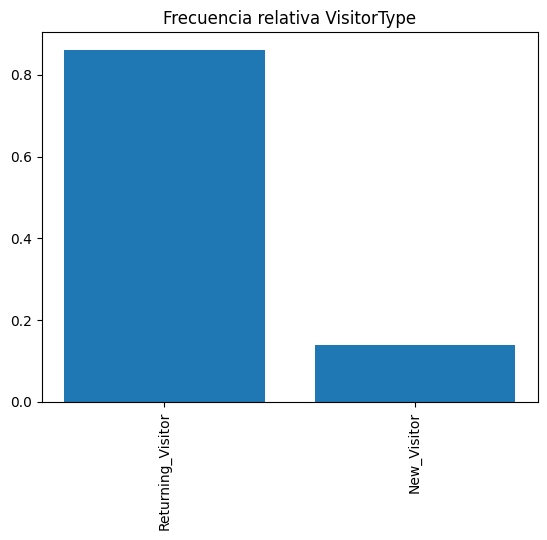

########### Para  OperatingSystems ###########
                     count
OperatingSystems          
2                 0.537957
1                 0.210362
3                 0.207985
4                 0.039023
8                 0.002050


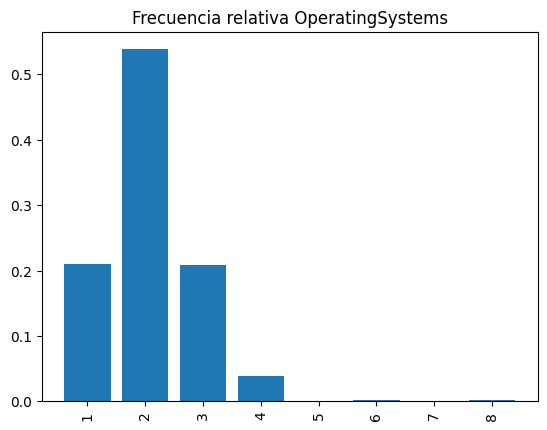

########### Para  Browser ###########
            count
Browser          
2        0.648713
1        0.200443
4        0.059764
5        0.037957
6        0.014265


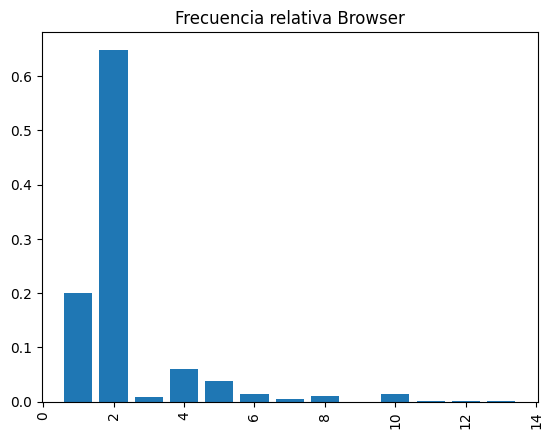

########### Para  Region ###########
           count
Region          
1       0.389982
3       0.195606
4       0.095917
2       0.092228
6       0.065830


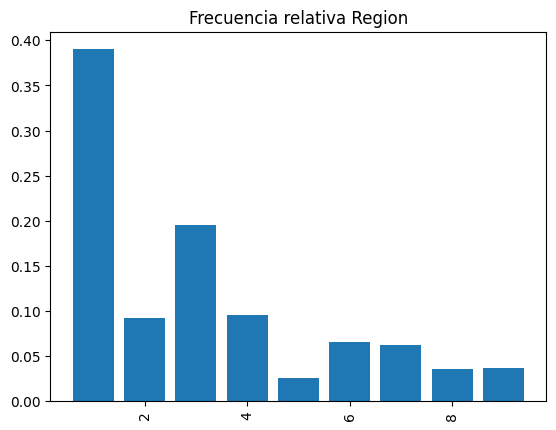

In [11]:
for i in ['Month', 'Weekend', 'VisitorType', 'OperatingSystems', 'Browser', 'Region']:
    print('########### Para ', i, '###########')
    aux = pd.DataFrame(df[i].value_counts()/len(df[i]))
    print(aux.head())
    plt.bar(x=aux.index, height=aux['count'])
    title = 'Frecuencia relativa ' + i
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()



Parece que se hacen más compras en determinados meses y en días de diario. Además, la mayoría de consumidosres son reincidentes.

Para el resto de variables nominales, al estar codificadas, no puedo extraer conclusiones lógicas.

Antes de pasar al resto de las variables, veamos si alguna nominal se puede eliminar haciendo uso del test chi cuadrado para ver si dos variables son independientes o no.

In [12]:
for i in ['Month', 'Weekend', 'VisitorType', 'OperatingSystems', 'Browser', 'Region']:
    crosstab = pd.crosstab(df.Revenue, df[i], margins = True)
    data = [crosstab.iloc[0], crosstab.iloc[1]]
    stat, p, dof, expected = chi2_contingency(data)
    
    # interpret p-value
    alpha = 0.05
    print('Para la variable ' + i + ' el p-valor es de ' + str(p))
    if p <= alpha:
        print('Dependientes (rechazamos H0)')
    else:
        print('Independientes (No podemos rechazar H0)')


Para la variable Month el p-valor es de 2.4288597214472755e-76
Dependientes (rechazamos H0)
Para la variable Weekend el p-valor es de 0.0049408252207024305
Dependientes (rechazamos H0)
Para la variable VisitorType el p-valor es de 1.5616607454954986e-29
Dependientes (rechazamos H0)
Para la variable OperatingSystems el p-valor es de 1.6990420117827938e-12
Dependientes (rechazamos H0)
Para la variable Browser el p-valor es de 0.05164036302133091
Independientes (No podemos rechazar H0)
Para la variable Region el p-valor es de 0.4855815274045451
Independientes (No podemos rechazar H0)


Para este conjunto de datos (ojo, para otro podría cambiar) vemos que la única variable que no parece relacionada con Revenue es el país, ya que su p-valor es excesivamente alto. 

La eliminamos.

In [13]:
df = df.drop(columns=['Region'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,11,Returning_Visitor,False,False


Pasemos ahora con el resto de las variables

In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend',
       'Revenue'],
      dtype='object')

########### Para  Administrative ###########
La moda es 0.0
La media es 2.3298081652729956
El máximo es 27.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 4.0
El rango es 27.0
El rango intercuartilico es 4.0
La desviación típica es 3.329419740446721
La varianza es 11.08503580807631
El coeficiente de asimetria es 1.9524876368430983
El coeficiente de curtosis es 4.6624212679413


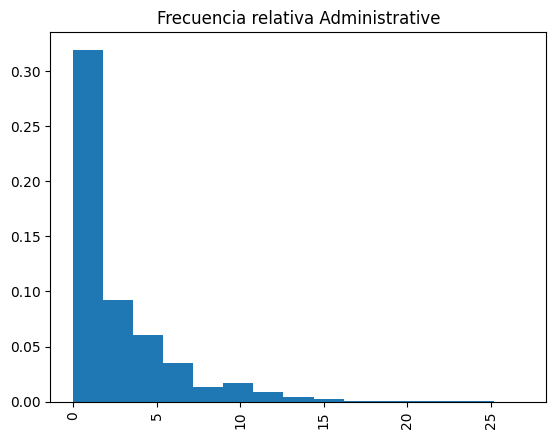

########### Para  Administrative_Duration ###########
La moda es 0.0
La media es 81.25466002213331
El máximo es 3398.75
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 94.0
El rango es 3398.75
El rango intercuartilico es 94.0
La desviación típica es 176.84825363085525
La varianza es 31275.304812283313
El coeficiente de asimetria es 5.600750553812376
El coeficiente de curtosis es 50.46907751794555


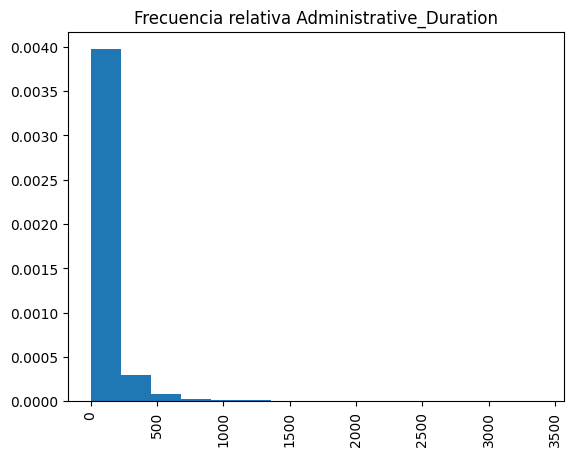

########### Para  Informational ###########
La moda es 0.0
La media es 0.5076242006886375
El máximo es 24.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 24.0
El rango intercuartilico es 0.0
La desviación típica es 1.274969224601481
La varianza es 1.6255465236809015
El coeficiente de asimetria es 4.021410593360267
El coeficiente de curtosis es 26.740835860363244


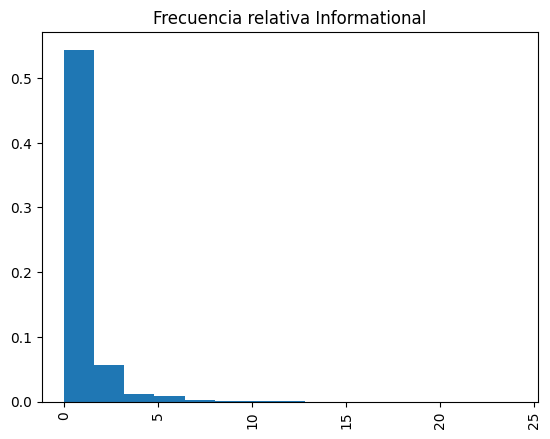

########### Para  Informational_Duration ###########
La moda es 0.0
La media es 34.76146907543245
El máximo es 2549.375
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 2549.375
El rango intercuartilico es 0.0
La desviación típica es 141.39289121085127
La varianza es 19991.949684963627
El coeficiente de asimetria es 7.548794241512016
El coeficiente de curtosis es 75.65856365762419


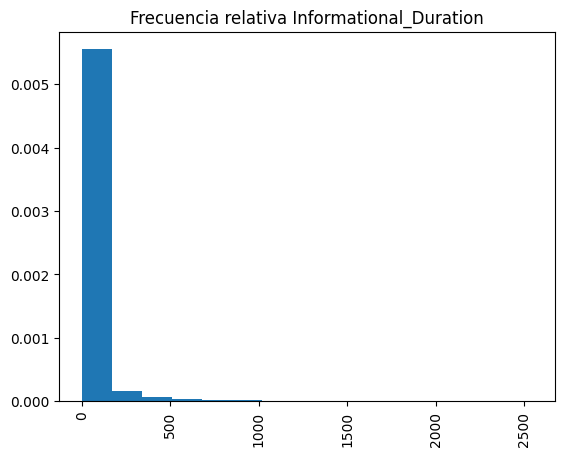

########### Para  ProductRelated ###########
La moda es 1.0
La media es 31.98155435317265
El máximo es 705.0
El mínimo es 0.0
El percentil 25% es 7.0
El percentil 75% es 38.0
El rango es 705.0
El rango intercuartilico es 31.0
La desviación típica es 44.59419646943498
La varianza es 1988.6423587545678
El coeficiente de asimetria es 4.332821009856091
El coeficiente de curtosis es 31.08914404264531


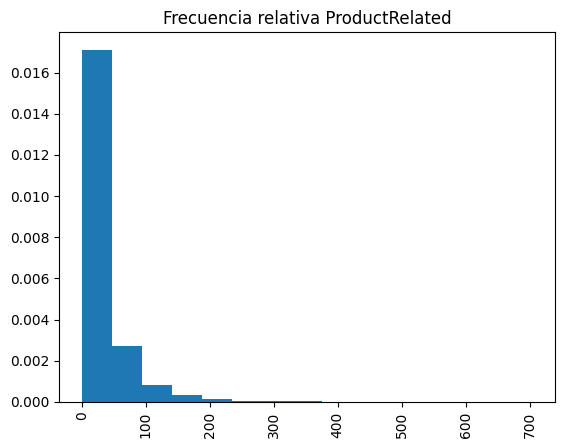

########### Para  ProductRelated_Duration ###########
La moda es 0.0
La media es 1203.6351023876448
El máximo es 63973.52223
El mínimo es 0.0
El percentil 25% es 190.0
El percentil 75% es 1475.3416670000001
El rango es 63973.52223
El rango intercuartilico es 1285.3416670000001
La desviación típica es 1919.0125773916106
La varianza es 3682609.2721871925
El coeficiente de asimetria es 7.261030457724831
El coeficiente de curtosis es 136.9530636441004


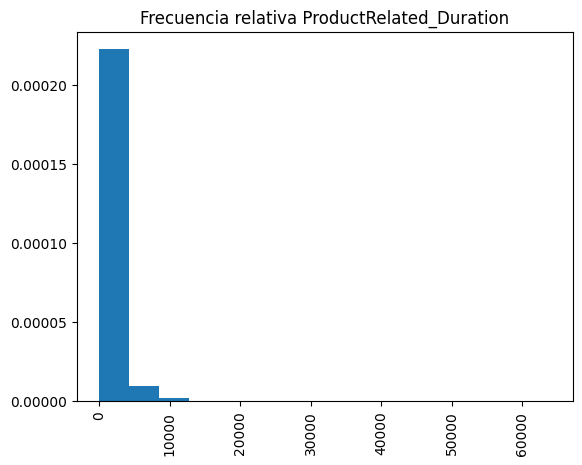

########### Para  BounceRates ###########
La moda es 0.0
La media es 0.02160623506148549
El máximo es 0.2
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.016666667
El rango es 0.2
El rango intercuartilico es 0.016666667
La desviación típica es 0.0473857855174203
La varianza es 0.0022454126691029593
El coeficiente de asimetria es 3.017640222185929
El coeficiente de curtosis es 8.234305293618512


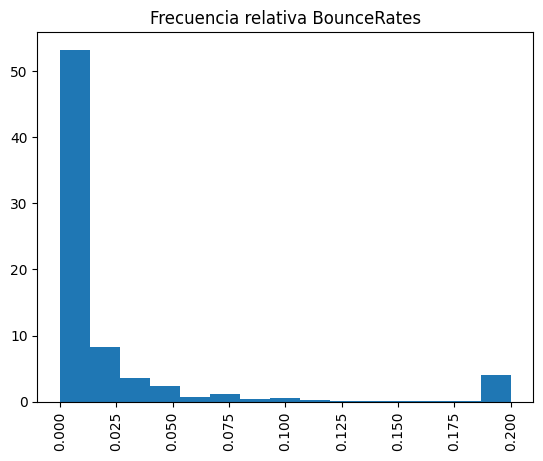

########### Para  ExitRates ###########
La moda es 0.2
La media es 0.042466084004262994
El máximo es 0.2
El mínimo es 0.0
El percentil 25% es 0.014285714
El percentil 75% es 0.05
El rango es 0.2
El rango intercuartilico es 0.035714286000000005
La desviación típica es 0.04773571861338199
La varianza es 0.0022786988315359837
El coeficiente de asimetria es 2.1830972762526524
El coeficiente de curtosis es 4.24542770956431


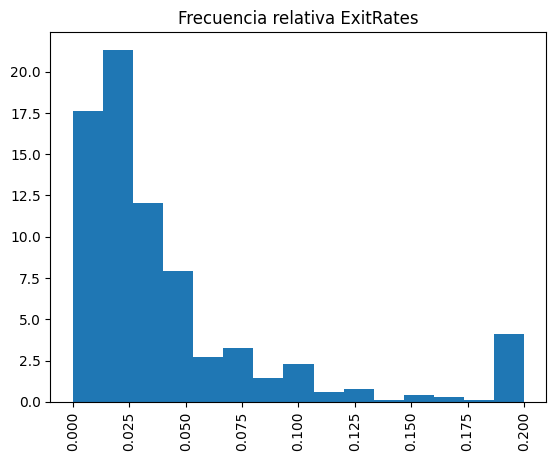

########### Para  PageValues ###########
La moda es 0.0
La media es 5.82622113526652
El máximo es 361.7637419
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 361.7637419
El rango intercuartilico es 0.0
La desviación típica es 18.10670558274047
La varianza es 327.852787060045
El coeficiente de asimetria es 6.10652584262962
El coeficiente de curtosis es 59.332065162524415


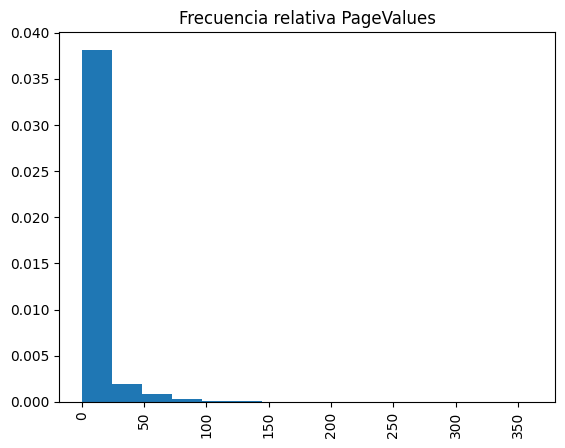

########### Para  SpecialDay ###########
La moda es 0.0
La media es 0.061960977209378584
El máximo es 1.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 1.0
El rango intercuartilico es 0.0
La desviación típica es 0.19974770785232163
La varianza es 0.03989914679225643
El coeficiente de asimetria es 3.2856292190443828
El coeficiente de curtosis es 9.793143488012554


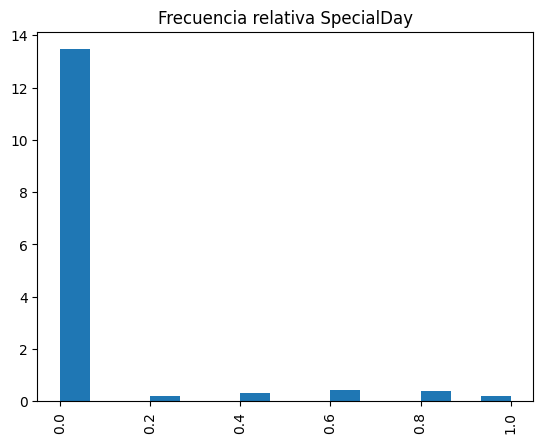

########### Para  TrafficType ###########
La moda es 2
La media es 4.005000819806526
El máximo es 20
El mínimo es 1
El percentil 25% es 2.0
El percentil 75% es 4.0
El rango es 19
El rango intercuartilico es 2.0
La desviación típica es 3.8987418684651542
La varianza es 15.200188156923163
El coeficiente de asimetria es 1.9317816350740518
El coeficiente de curtosis es 3.3414176204579737


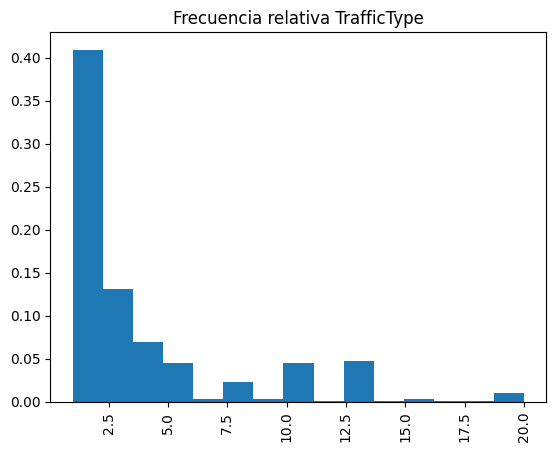

In [15]:
for i in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType']:
     print('########### Para ', i, '###########')
     print('La moda es', df[i].mode()[0])
     print('La media es',df[i].mean())
     print('El máximo es', max(df[i]))
     print('El mínimo es', min(df[i]))
     print('El percentil 25% es', df[i].quantile(0.25))
     print('El percentil 75% es', df[i].quantile(0.75))
     print('El rango es', max(df[i]) - min(df[i]))
     print('El rango intercuartilico es', df[i].quantile(0.75) - df[i].quantile(0.25))
     print('La desviación típica es', df[i].std())
     print('La varianza es', df[i].var())
     print('El coeficiente de asimetria es', df[i].skew())
     print('El coeficiente de curtosis es', df[i].kurtosis())
     plt.hist(df[i], bins=15, density=True)
     title = 'Frecuencia relativa ' + i
     plt.title(title)
     plt.xticks(rotation=90)
     plt.show()

Podemos sacar una serie de conclusiones:
- Hay un claro predominio por el valor 0 en todas las variables.
- Para las variables en forma de porcentaje hay un tope en 0.2.
- El coeficiente de curtosis es muy alto. Parece que existen bastantes outliers.

Vamos a eliminar outliers haciendo uso del algoritmo de deteccion de anomalias.

Primero tendremos que discretizar variables.

In [16]:
# Primero tratamos las variables categoricas, Month y VisitorType.
# Para VisitorType mapearemos sus valores a 1 y 0, al solo tener dos categorías, siendo 1 que vuelve y 0 que es nuevo.
# Para Month usaremos un One Hot Encoder, para evitar afirmar que diciembre es 12 veces más grande que enero.
df = pd.get_dummies(df, columns=['Month'])
df['Returning_Visitor'] = df['VisitorType'].map({'Returning_Visitor': True, 'New_Visitor' : False}) 

# Eliminamos la columna de la que hemos hecho el mapeo
df = df.drop(columns=['VisitorType'])

In [17]:
# Escalamos los datos para el algoritmo de deteccion de anomalias

scaler = StandardScaler()

# Escalamos todas las variables, incluida la independiente. Para los algoritmos de predicción cambiaremos esto
X_scaled = scaler.fit_transform(df)

lof_outlier = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof_outlier.fit_predict(X_scaled) # entrenamos el modelo y predecimos sobre los mismos datos

In [18]:
# Hay 1106 outliers
sum(outlier_scores==-1)

1106

In [19]:
# Se muestran los 1106 outliers
df['Outlier'] = outlier_scores==-1
df[df['Outlier']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Returning_Visitor,Outlier
29,1.0,6.000000,1.0,0.00,45.0,1582.750000,0.043478,0.050821,54.179764,0.4,...,True,False,False,False,False,False,False,False,True,True
57,4.0,56.000000,2.0,120.00,36.0,998.741667,0.000000,0.014736,19.447079,0.2,...,True,False,False,False,False,False,False,False,True,True
62,12.0,279.416667,0.0,0.00,42.0,1553.583333,0.009000,0.019667,38.308493,0.0,...,True,False,False,False,False,False,False,False,True,True
65,3.0,87.833333,0.0,0.00,27.0,798.333333,0.000000,0.012644,22.916036,0.8,...,True,False,False,False,False,False,False,False,True,True
66,4.0,44.000000,0.0,0.00,90.0,6951.972222,0.002151,0.015013,0.000000,0.0,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12271,3.0,52.750000,0.0,0.00,69.0,909.154870,0.002857,0.012225,8.086657,0.0,...,False,False,False,False,False,False,False,False,True,True
12295,0.0,0.000000,3.0,33.75,9.0,313.928571,0.033333,0.027778,0.000000,0.0,...,False,False,False,False,False,False,False,False,True,True
12317,3.0,100.500000,0.0,0.00,95.0,1453.640882,0.002105,0.012761,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,True
12324,0.0,0.000000,1.0,0.00,16.0,503.000000,0.000000,0.037647,0.000000,0.0,...,False,False,False,False,False,True,False,False,True,True


In [20]:
# Nos quedamos con el resto
df = df[~df['Outlier']]
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Returning_Visitor,Outlier
0,0.0,0.00,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
1,0.0,0.00,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
3,0.0,0.00,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
4,0.0,0.00,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
5,0.0,0.00,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2.0,64.75,0.0,0.0,44.0,1157.976190,0.000000,0.013953,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12326,0.0,0.00,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12327,0.0,0.00,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12328,4.0,75.00,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False


########### Para  Administrative ###########
La moda es 0.0
La media es 2.2666786873422287
El máximo es 24.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 4.0
El rango es 24.0
El rango intercuartilico es 4.0
La desviación típica es 3.2021593061084617
La varianza es 10.253824221697025
El coeficiente de asimetria es 1.8521356872104262
El coeficiente de curtosis es 3.9653202957913725


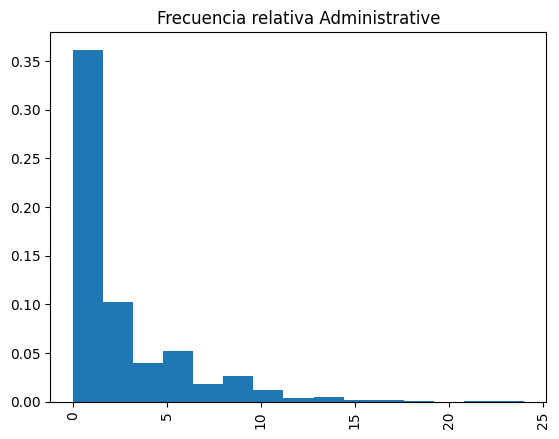

########### Para  Administrative_Duration ###########
La moda es 0.0
La media es 75.67702152068895
El máximo es 2156.166667
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 91.0
El rango es 2156.166667
El rango intercuartilico es 91.0
La desviación típica es 158.778360746048
La varianza es 25210.567841202163
El coeficiente de asimetria es 5.090165564422406
El coeficiente de curtosis es 38.66523950060262


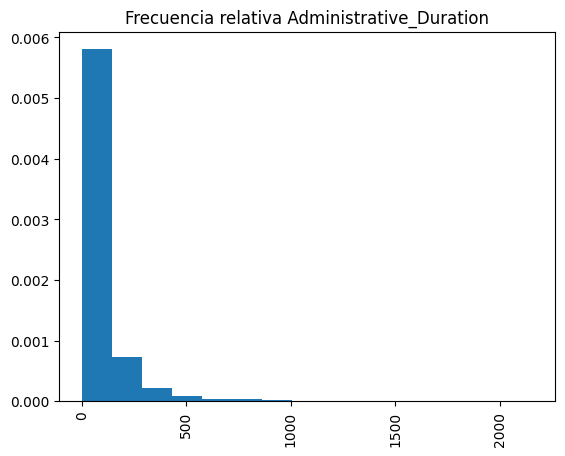

########### Para  Informational ###########
La moda es 0.0
La media es 0.46952758745041473
El máximo es 14.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 14.0
El rango intercuartilico es 0.0
La desviación típica es 1.2056093285489808
La varianza es 1.4534938530843244
El coeficiente de asimetria es 3.6836866659514755
El coeficiente de curtosis es 18.036908537323015


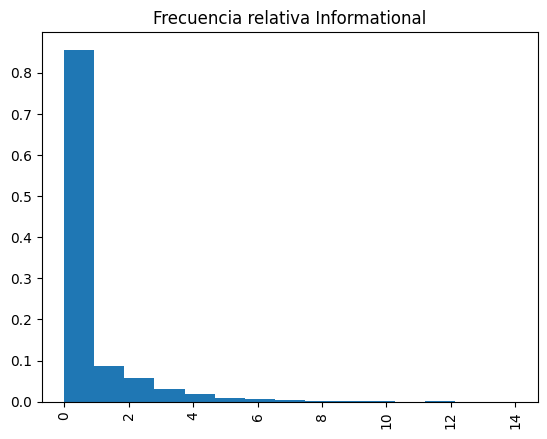

########### Para  Informational_Duration ###########
La moda es 0.0
La media es 31.104644583368373
El máximo es 2256.916667
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 2256.916667
El rango intercuartilico es 0.0
La desviación típica es 132.07445095685327
La varianza es 17443.660595554236
El coeficiente de asimetria es 7.662947298334866
El coeficiente de curtosis es 75.70924328562313


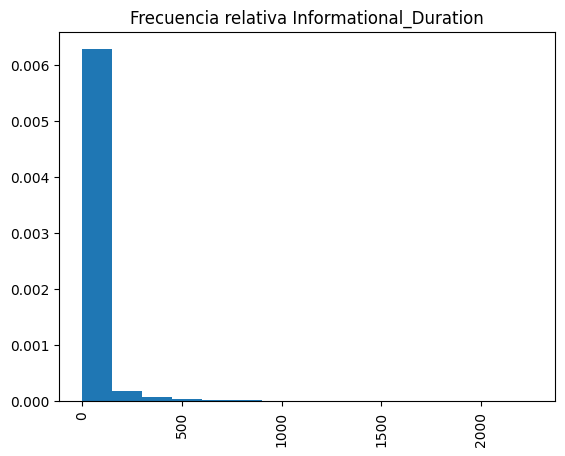

########### Para  ProductRelated ###########
La moda es 1.0
La media es 30.795618463757663
El máximo es 470.0
El mínimo es 0.0
El percentil 25% es 8.0
El percentil 75% es 37.0
El rango es 470.0
El rango intercuartilico es 29.0
La desviación típica es 39.70105545979257
La varianza es 1576.1738046215257
El coeficiente de asimetria es 3.5614361991343064
El coeficiente de curtosis es 19.31795627467697


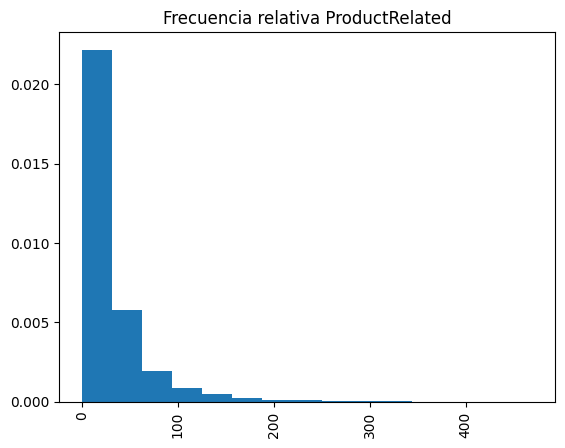

########### Para  ProductRelated_Duration ###########
La moda es 0.0
La media es 1140.239599531046
El máximo es 17550.58486
El mínimo es 0.0
El percentil 25% es 197.0
El percentil 75% es 1436.955357
El rango es 17550.58486
El rango intercuartilico es 1239.955357
La desviación típica es 1590.0986242375532
La varianza es 2528413.6348021594
El coeficiente de asimetria es 3.3866852328142176
El coeficiente de curtosis es 16.780768543791943


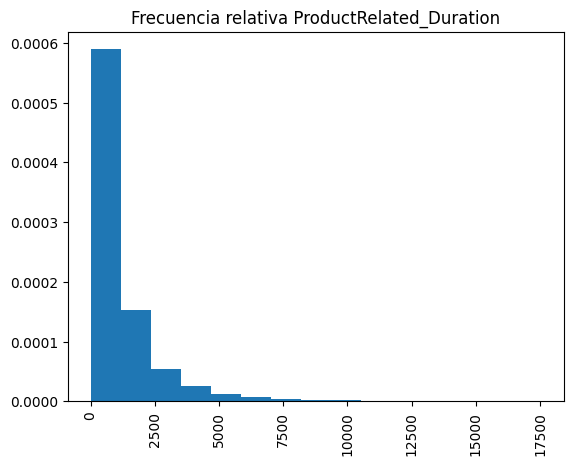

########### Para  BounceRates ###########
La moda es 0.0
La media es 0.019611958826992428
El máximo es 0.2
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.016
El rango es 0.2
El rango intercuartilico es 0.016
La desviación típica es 0.0437071708009933
La varianza es 0.0019103167794272016
El coeficiente de asimetria es 3.2691708573246845
El coeficiente de curtosis es 10.204795529991543


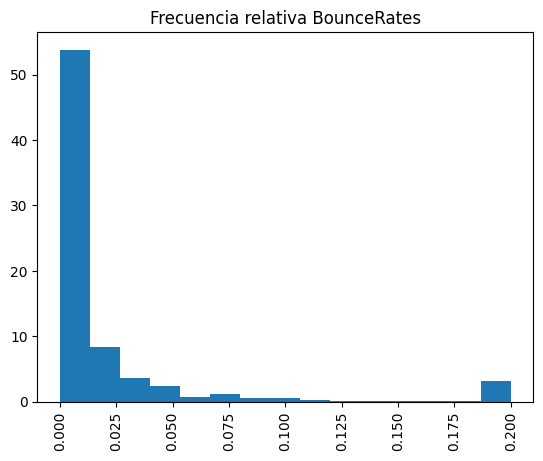

########### Para  ExitRates ###########
La moda es 0.2
La media es 0.040803885193202306
El máximo es 0.2
El mínimo es 0.0
El percentil 25% es 0.014285714
El percentil 75% es 0.04762931075
El rango es 0.2
El rango intercuartilico es 0.03334359675
La desviación típica es 0.0448357457569425
La varianza es 0.0020102440975811875
El coeficiente de asimetria es 2.2745600147092735
El coeficiente de curtosis es 4.970450696211314


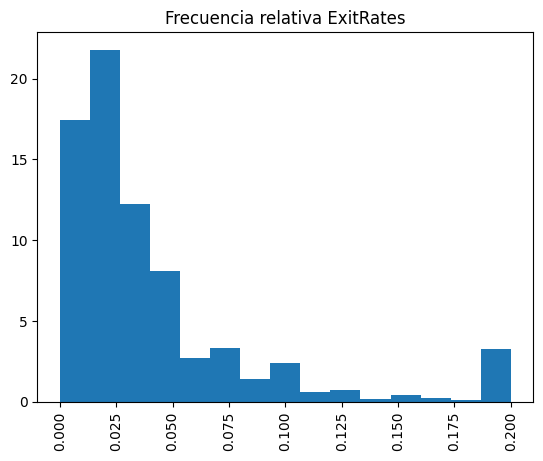

########### Para  PageValues ###########
La moda es 0.0
La media es 5.557951463706635
El máximo es 287.9537928
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 287.9537928
El rango intercuartilico es 0.0
La desviación típica es 17.414210445600308
La varianza es 303.2547254436548
El coeficiente de asimetria es 6.0440517525557755
El coeficiente de curtosis es 56.47005493829352


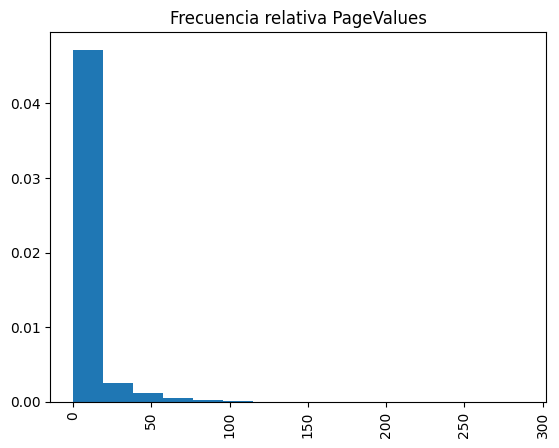

########### Para  SpecialDay ###########
La moda es 0.0
La media es 0.06119725928597187
El máximo es 1.0
El mínimo es 0.0
El percentil 25% es 0.0
El percentil 75% es 0.0
El rango es 1.0
El rango intercuartilico es 0.0
La desviación típica es 0.19660340480901578
La varianza es 0.03865289878249773
El coeficiente de asimetria es 3.2689796256351995
El coeficiente de curtosis es 9.684090566126223


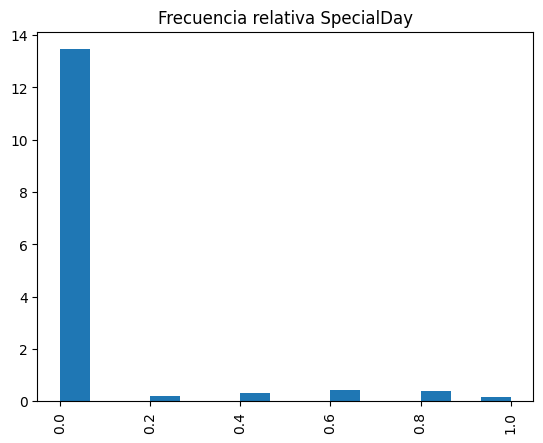

########### Para  TrafficType ###########
La moda es 2
La media es 3.9121889650198343
El máximo es 20
El mínimo es 1
El percentil 25% es 2.0
El percentil 75% es 4.0
El rango es 19
El rango intercuartilico es 2.0
La desviación típica es 3.7496066821286123
La varianza es 14.059550270663541
El coeficiente de asimetria es 1.928090813927064
El coeficiente de curtosis es 3.3018288155705755


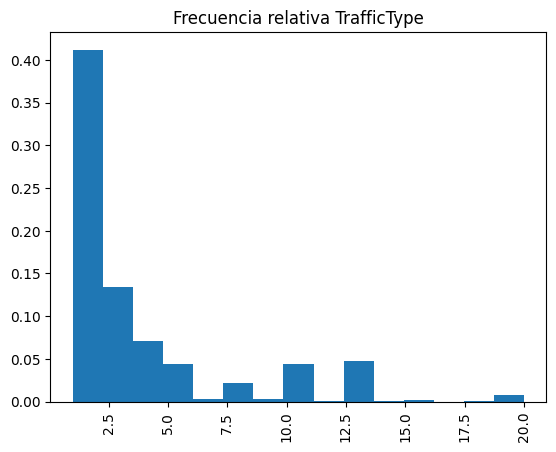

In [21]:
for i in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType']:
     print('########### Para ', i, '###########')
     print('La moda es', df[i].mode()[0])
     print('La media es',df[i].mean())
     print('El máximo es', max(df[i]))
     print('El mínimo es', min(df[i]))
     print('El percentil 25% es', df[i].quantile(0.25))
     print('El percentil 75% es', df[i].quantile(0.75))
     print('El rango es', max(df[i]) - min(df[i]))
     print('El rango intercuartilico es', df[i].quantile(0.75) - df[i].quantile(0.25))
     print('La desviación típica es', df[i].std())
     print('La varianza es', df[i].var())
     print('El coeficiente de asimetria es', df[i].skew())
     print('El coeficiente de curtosis es', df[i].kurtosis())
     plt.hist(df[i], bins=15, density=True)
     title = 'Frecuencia relativa ' + i
     plt.title(title)
     plt.xticks(rotation=90)
     plt.show()

Vemos que, aunque las gráficas aún tienen un claro predominio por el valor 0, la descompensación ha menguado.

Hagamos el análisis bivariante con estas variables.

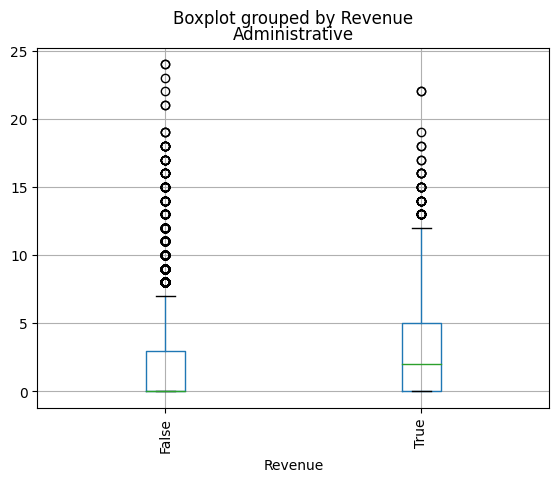

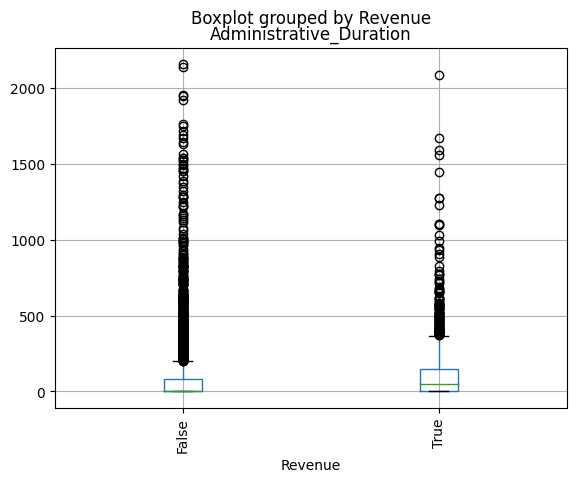

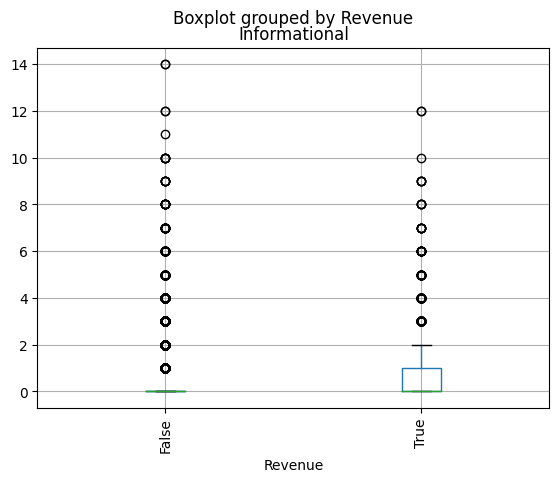

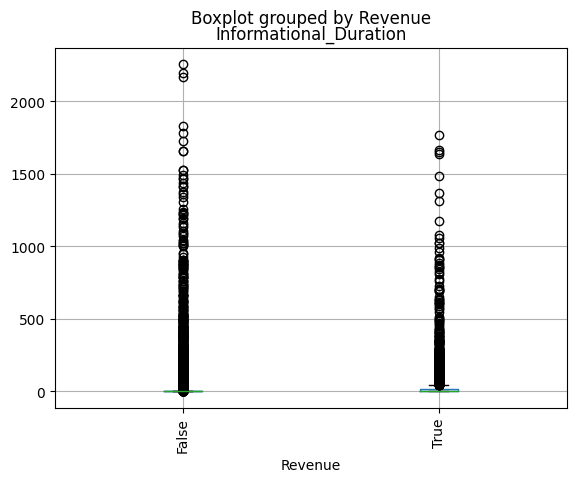

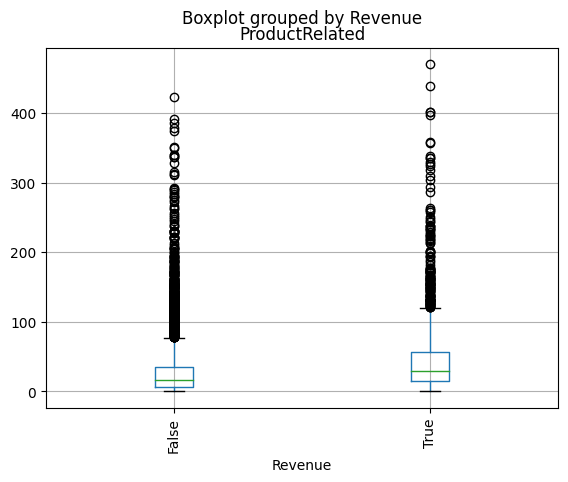

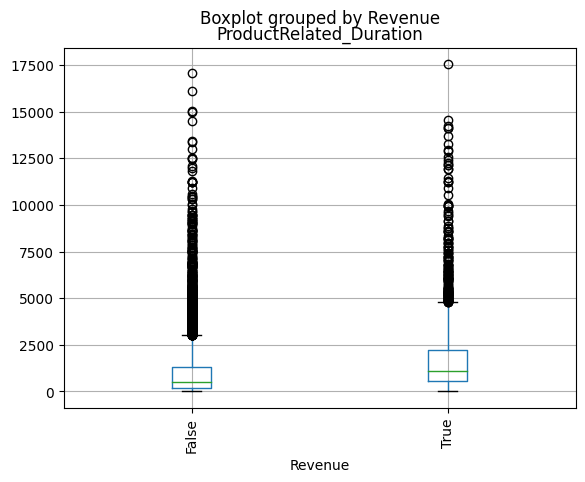

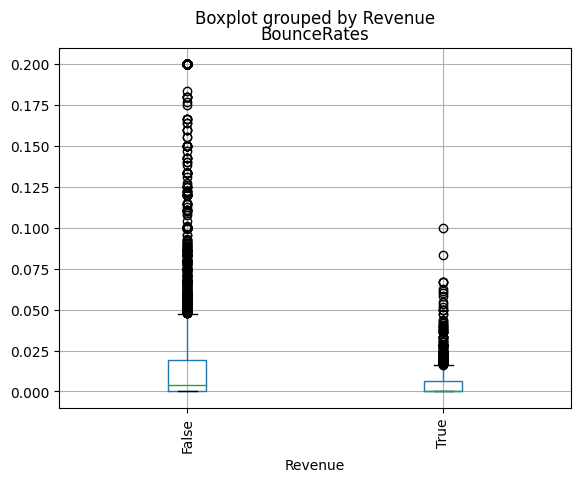

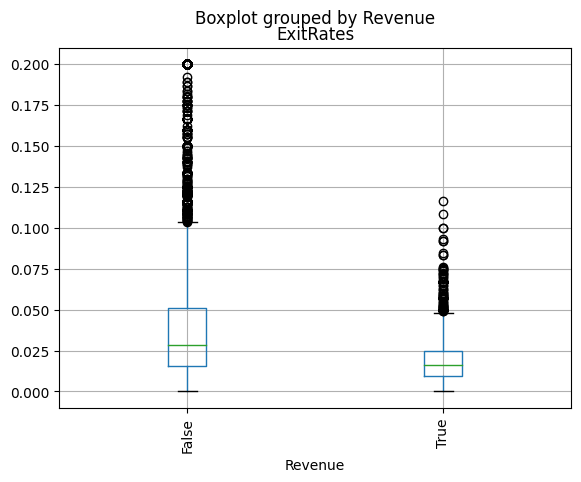

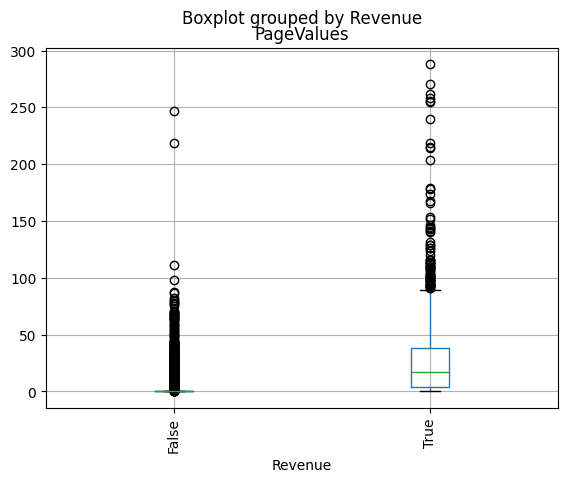

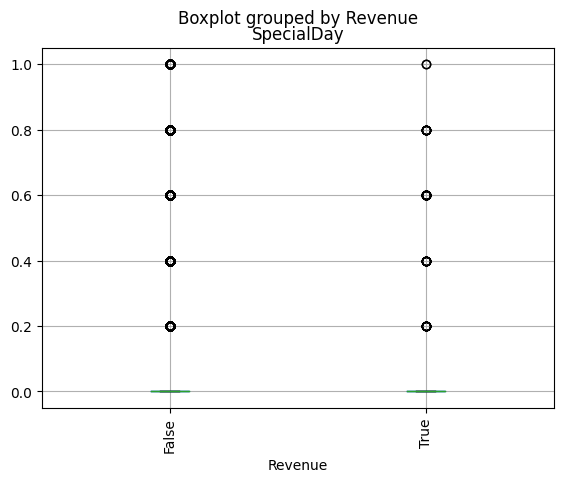

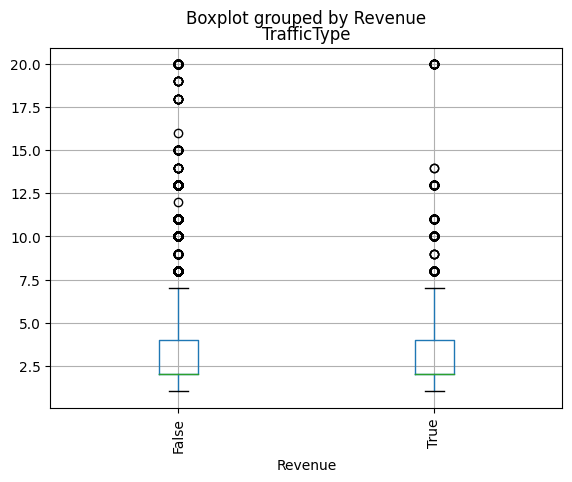

In [22]:
for i in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType']:
    df.boxplot(column=[i], by='Revenue')
    plt.xticks(rotation=90)
    plt.show()

A pesar de que los outliers que el boxplot muestra no permiten verlo con total claridad, todas las variables menos SpecialDay y TrafficType las cajas de bigotes se diferencian entre sí.

Para el caso de SpecialDay, al tener pocos valores y su amplia mayoría en 0, el resultado del boxplot no es muy concluyente.

Repetimos la misma operación comparando medias.

########### Para Administrative ###########


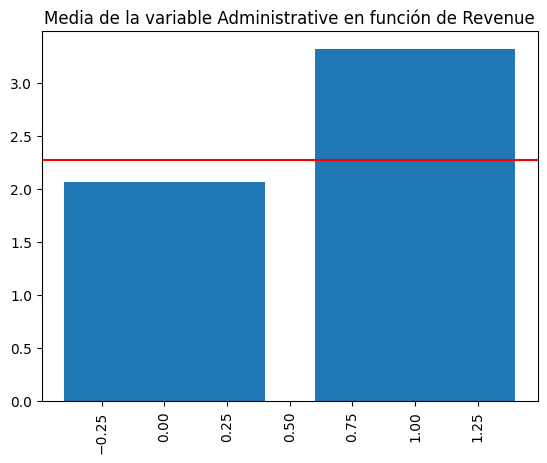

########### Para Administrative_Duration ###########


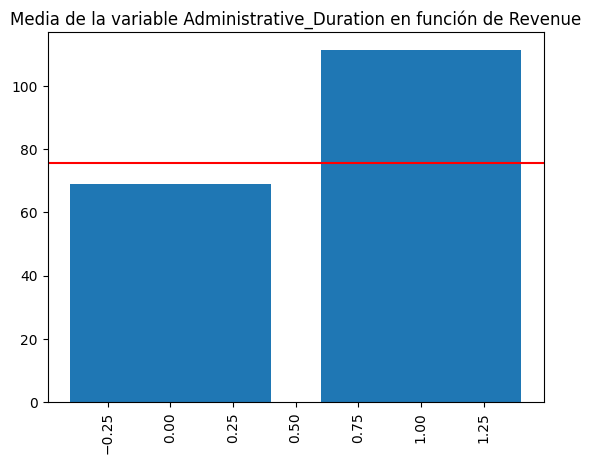

########### Para Informational ###########


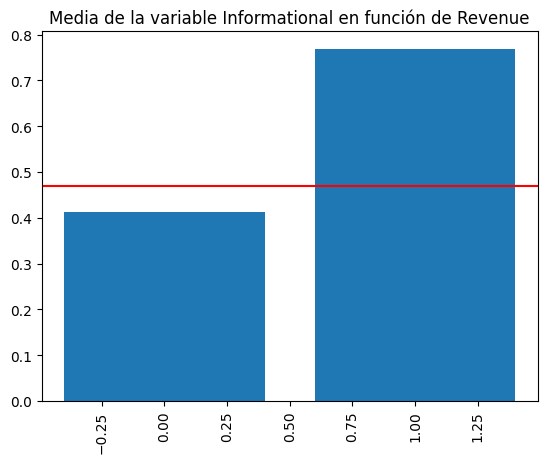

########### Para Informational_Duration ###########


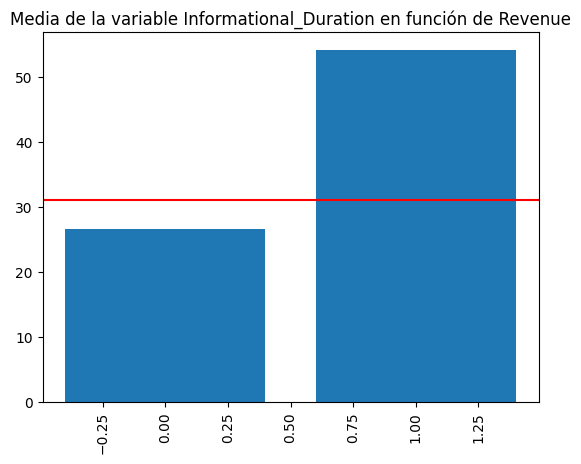

########### Para ProductRelated ###########


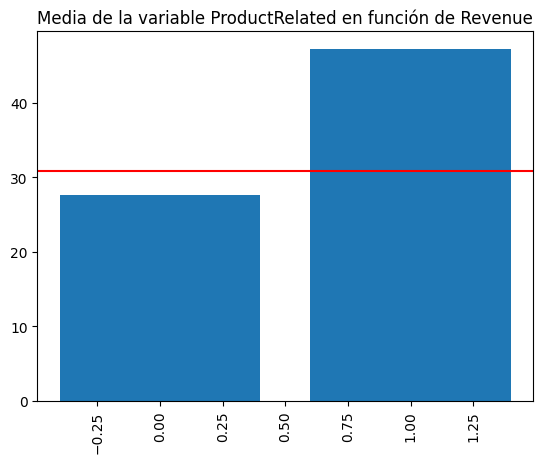

########### Para ProductRelated_Duration ###########


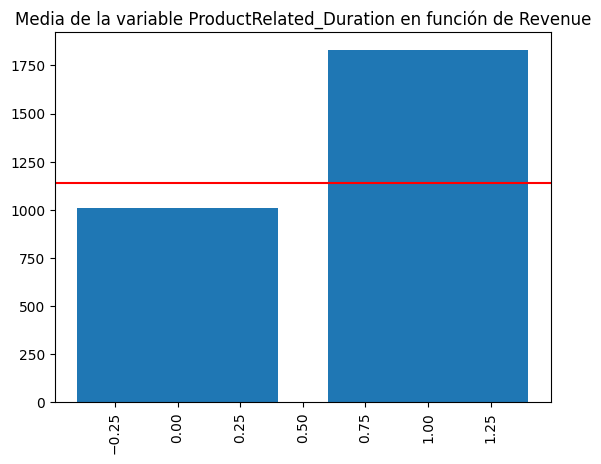

########### Para BounceRates ###########


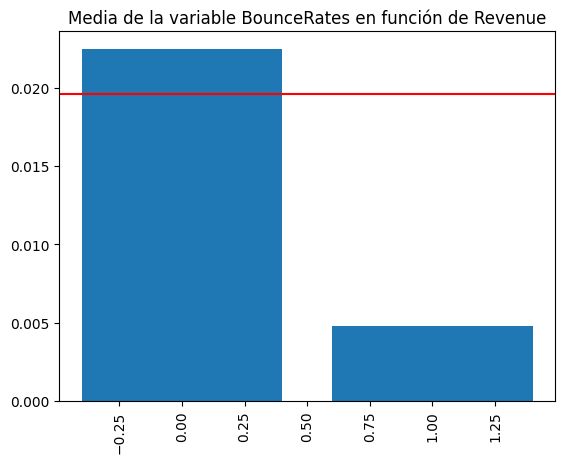

########### Para ExitRates ###########


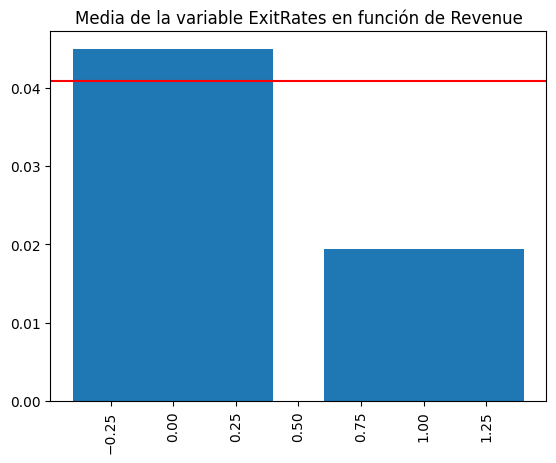

########### Para PageValues ###########


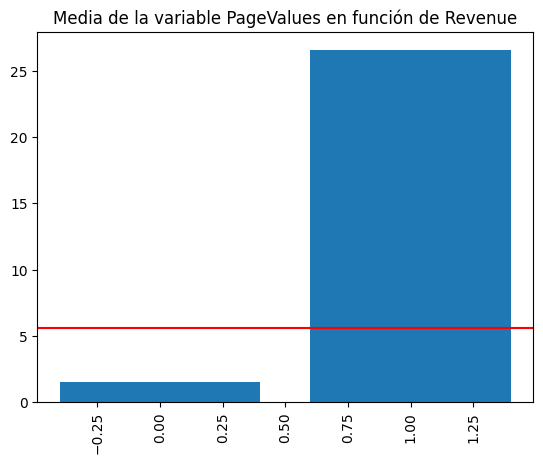

########### Para SpecialDay ###########


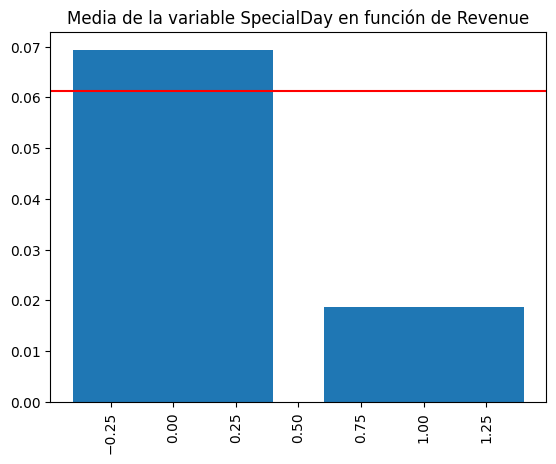

########### Para TrafficType ###########


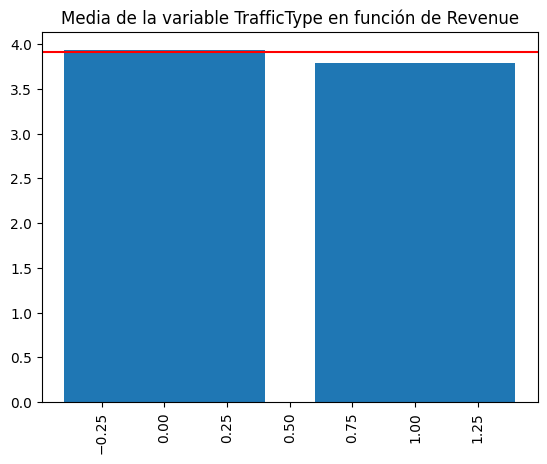

In [23]:
for i in ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType']:
    print('########### Para', i, '###########')
    aux = pd.DataFrame(df.groupby(by='Revenue')[i].mean())
    title = 'Media de la variable ' + i + ' en función de Revenue'
    plt.title(title)
    plt.bar(x=aux.index, height=aux[i])
    plt.axhline(y = df[i].mean(), color = 'r', linestyle = '-') 
    plt.xticks(rotation=90)
    plt.show()

Para evitar sesgos visuales producidos por la escala del boxplot, se ha dibujado en rojo una linea correspondiente a la media de toda la categoría sin agrupar.

Podemos ver que la diferencia de medias es significativa para todas las variables excepto TrafficType.

<Axes: >

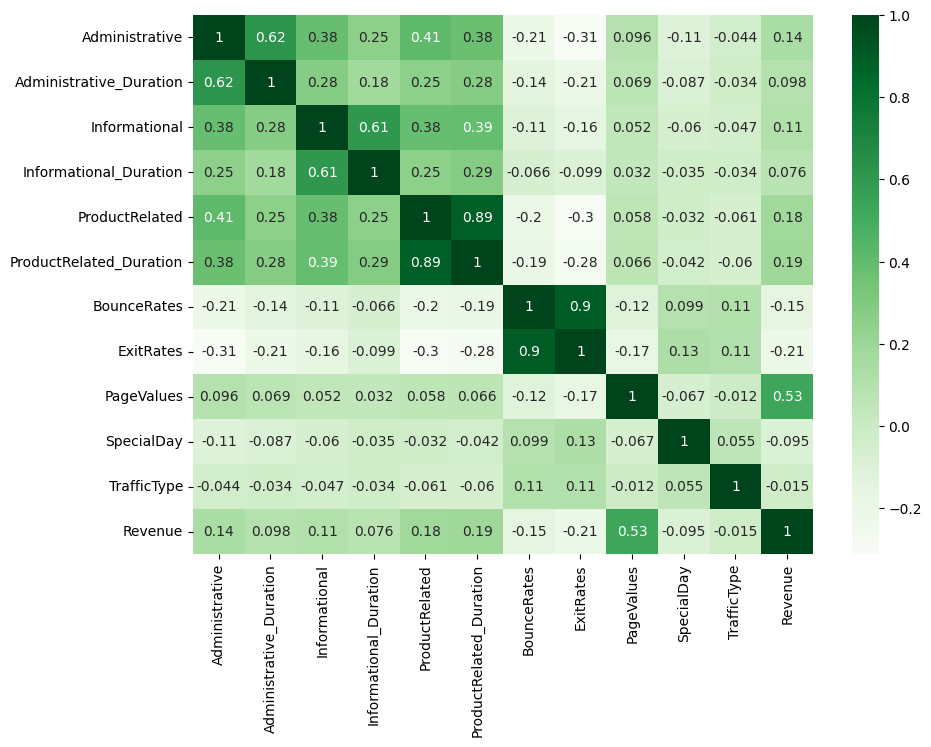

In [24]:
import seaborn as sns #ggplot
plt.figure(figsize=(10,7))
df_aux = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'TrafficType', 'Revenue']]
sns.heatmap(df_aux.corr(), annot=True, cmap='Greens')

Como hemos podido ver la variable TrafficType no está muy correlada con Revenue. La eliminaremos del modelo también. 

In [25]:
df = df.drop(columns=['TrafficType'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Returning_Visitor,Outlier
0,0.0,0.00,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
1,0.0,0.00,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
3,0.0,0.00,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
4,0.0,0.00,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
5,0.0,0.00,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12323,2.0,64.75,0.0,0.0,44.0,1157.976190,0.000000,0.013953,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12326,0.0,0.00,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12327,0.0,0.00,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
12328,4.0,75.00,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False


### 3. Estandarización

In [26]:
# Seleccionamos X e y
X = df.drop('Revenue', axis=1)
y = df['Revenue']


# Esta vez solo escalamos las variables dependientes

scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

### 4. Regresión logística

In [27]:
# Antes de nada evitamos que nos salgan warnings para dejar el código más legible

warnings.filterwarnings('ignore')

######### AUC test 1 #########
0.9041610543791504
{'C': 0.001, 'penalty': None}
0.1724874345780838
######### AUC test 2 #########
0.907633368687101
{'C': 1.0, 'penalty': 'l2'}
0.1318382574176962
######### AUC test 3 #########
0.9063428055079774
{'C': 0.001, 'penalty': None}
0.15767238846985204
######### AUC test 4 #########
0.9150141603381675
{'C': 0.001, 'penalty': None}
0.16160269866784224
######### AUC test 5 #########
0.8992355233278282
{'C': 0.001, 'penalty': None}
0.12992075891479565
######### AUC test 6 #########
0.9170430975495019
{'C': 0.001, 'penalty': None}
0.16186050575070057


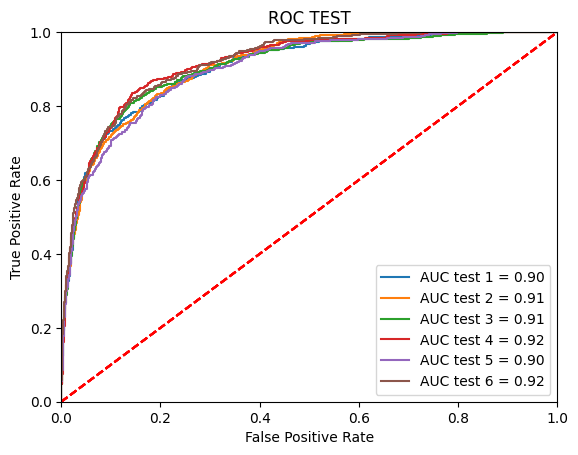

El AUC medio de todas las particiones es de 0.9082383349649543


In [28]:
params = {'penalty': ['l1', 'l2', 'elasticnet', None], "C":np.logspace(-3,3,7)}
log = LogisticRegression()
logreg_cv=GridSearchCV(log,params,cv=3)
aucs = np.array([])

for index in range(1,7):
    X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size = 0.3, random_state= 1 + index*10)
    log_cv = logreg_cv.fit(X_train,y_train)
    y_test_prob_log_cv  = log_cv.predict_proba(X_test) # probabilidades devueltas por el modelo para test
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob_log_cv[:, 1])
    roc_auc = auc(fpr, tpr)
    max_threshold = threshold[np.argmax(tpr - fpr)]
    aucs = np.append(aucs, [roc_auc])

    print("######### AUC test " + str(index) + " #########")
    print(roc_auc)
    print(logreg_cv.best_params_)
    print(max_threshold)

    plt.title('ROC TEST')
    plt.plot(fpr, tpr, label = 'AUC test ' + str(index) + ' = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()
print('El AUC medio de todas las particiones es de ' + str(aucs.mean()))

### 5. Red neuronal

In [29]:
print('El número de capas ocultas debe ser ' + str(round(np.sqrt(X_estandarizado.shape[1])*2)) + ' o ' +  str(round(2/3 * X_estandarizado.shape[1] + 2)))

El número de capas ocultas debe ser 10 o 19


######### AUC test 1 #########
0.929389918243328
{'batch_size': 25, 'hidden_layer_sizes': 10, 'max_iter': 100}
0.11886507223897891
######### AUC test 2 #########
0.9305003670356029
{'batch_size': 50, 'hidden_layer_sizes': 10, 'max_iter': 100}
0.1248071967023299
######### AUC test 3 #########
0.9251844309277517
{'batch_size': 50, 'hidden_layer_sizes': 10, 'max_iter': 200}
0.12414399392244081
######### AUC test 4 #########
0.9342227080841385
{'batch_size': 50, 'hidden_layer_sizes': 10, 'max_iter': 100}
0.14901277319015505
######### AUC test 5 #########
0.9208969859620149
{'batch_size': 25, 'hidden_layer_sizes': 10, 'max_iter': 100}
0.11524492097973395
######### AUC test 6 #########
0.9303577251635804
{'batch_size': 50, 'hidden_layer_sizes': 10, 'max_iter': 100}
0.21361264462741553


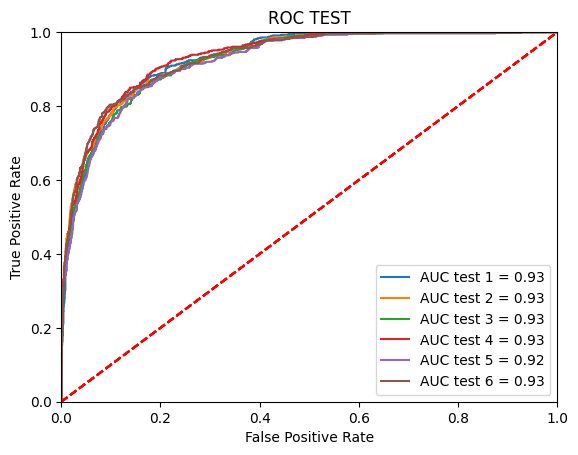

El AUC medio de todas las particiones es de 0.928425355902736


In [30]:
modelo = MLPClassifier()
parametros = {'max_iter': [100,200], # número de epochs
              'hidden_layer_sizes':[10,19], # Número de neuronas capa oculta (para varias capas ocultas, tupla de neuronas)
              'batch_size': [25, 50]}
modelo_gs = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', verbose=0)
aucs = np.array([])


for index in range(1,7):
    X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size = 0.3, random_state= 1 + index*10)
    modelo_gs.fit(X_train, y_train)
    mejor_modelo = MLPClassifier(**modelo_gs.best_params_, verbose=False)
    mejor_modelo.fit(X_train, y_train)
    y_test_pred_prob = mejor_modelo.predict_proba(X_test)     
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    max_threshold = threshold[np.argmax(tpr - fpr)]
    aucs = np.append(aucs, [roc_auc])


    print("######### AUC test " + str(index) + " #########")
    print(roc_auc)
    print(modelo_gs.best_params_)
    print(max_threshold)

    plt.title('ROC TEST')
    plt.plot(fpr, tpr, label = 'AUC test ' + str(index) + ' = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

print('El AUC medio de todas las particiones es de ' + str(aucs.mean()))

### 6. KNN

######### AUC test 1 #########
0.8719419558952513
{'n_neighbors': 30}
0.13333333333333333
######### AUC test 2 #########
0.8509362485397943
{'n_neighbors': 26}
0.15384615384615385
######### AUC test 3 #########
0.864514073394743
{'n_neighbors': 35}
0.14285714285714285
######### AUC test 4 #########
0.8768705372524742
{'n_neighbors': 35}
0.14285714285714285
######### AUC test 5 #########
0.8550958660198184
{'n_neighbors': 34}
0.11764705882352941
######### AUC test 6 #########
0.8797112886498739
{'n_neighbors': 30}
0.13333333333333333


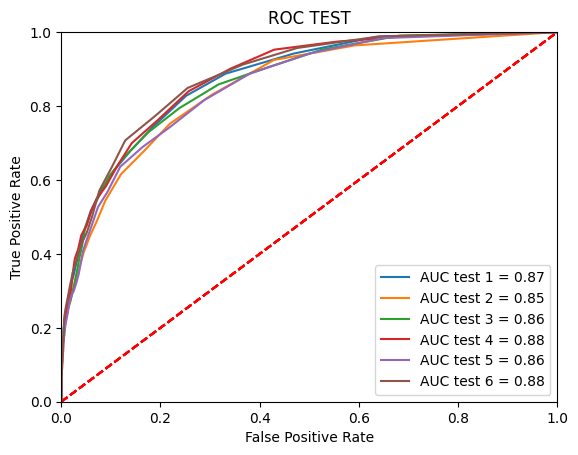

El AUC medio de todas las particiones es de 0.8665116616253258


In [31]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(10,40)}

knn_cv = GridSearchCV(knn, param_grid=params, cv = 3, 
                         scoring='roc_auc')
aucs = np.array([])


for index in range(1,7):
    X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size = 0.3, random_state= 1 + index*10)
    knn_cv.fit(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_knn[:, 1])
    roc_auc = auc(fpr, tpr)
    max_threshold = threshold[np.argmax(tpr - fpr)]
    aucs = np.append(aucs, [roc_auc])


    print("######### AUC test " + str(index) + " #########")
    print(roc_auc)
    print(knn_cv.best_params_)
    print(max_threshold)

    plt.title('ROC TEST')
    plt.plot(fpr, tpr, label = 'AUC test ' + str(index) + ' = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

print('El AUC medio de todas las particiones es de ' + str(aucs.mean()))

El mejor modelo de entre estos tres es el correspondiente a la red neuronal, con un AUC medio de aproximadamente 0.928

### 7. Métricas (con red neuronal)

In [34]:
# Entrenamos el modelo una vez más con los parámetros que mejor AUC daban.

X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size = 0.3)
mejor_modelo = MLPClassifier(batch_size=50, hidden_layer_sizes=10, max_iter=100, verbose=False)
mejor_modelo.fit(X_train, y_train)
y_test_pred_prob = mejor_modelo.predict_proba(X_test)     
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)
max_threshold = threshold[np.argmax(tpr - fpr)]



In [44]:
# Ahora observaremos la matriz de confusión y ciertas métricas.
# Usaremos el umbral que mejor relación entre falsos positivos y verdaderos positivos existe.

umbral = max_threshold
y_test_pred_log = 1*(y_test_pred_prob[:, 1] > umbral)

print('matriz de confusión')
print(confusion_matrix(y_test, y_test_pred_log))

print('accuracy')
print(round(accuracy_score(y_test, y_test_pred_log), 2))

print('precision')
print(round(precision_score(y_test, y_test_pred_log), 2))

print('recall')
print(round(recall_score(y_test, y_test_pred_log), 2))

print('F1-Score')
print(round(f1_score(y_test, y_test_pred_log), 2))


matriz de confusión
[[2501  278]
 [ 112  437]]
accuracy
0.88
precision
0.61
recall
0.8
F1-Score
0.69
